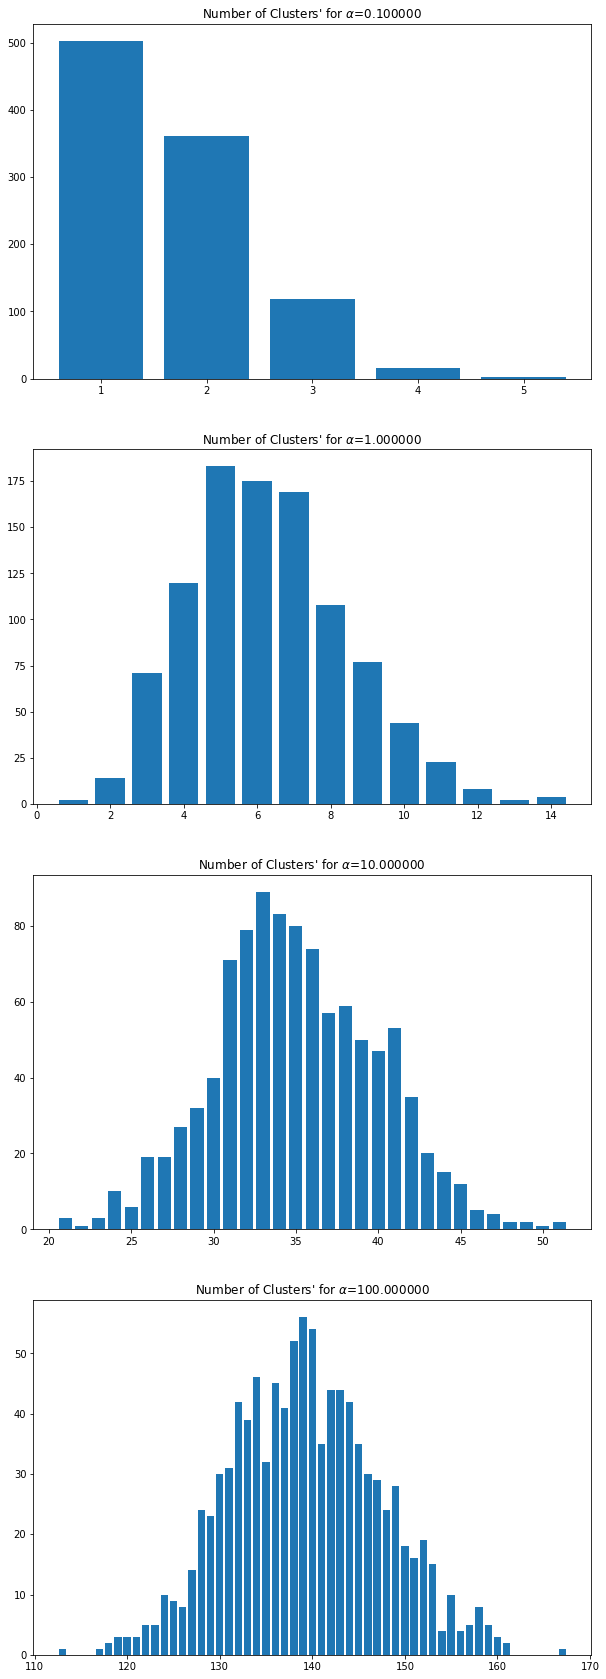

In [2]:
from collections import Counter
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
# Chinese-Restaurant-Progress
def CRP(alpha, iteration = 300):
    cluster = np.array([0])
    for i in range(iteration):
        n = i+1                         # n_th customer
        new_table = alpha/(alpha+n-1)   #new table probability
        old_tables = cluster/(n+alpha-1)#old tables probability
        prob_of_tables = np.append(old_tables, new_table)#all tables probability
        customer_table = np.random.choice(len(cluster)+1, size = 1, p = prob_of_tables)[0]
        if customer_table == len(cluster): #new tables
            cluster = np.append(cluster, 1)
        else:                               #new tables
            cluster[customer_table] += 1   
    return cluster
alpha_list = [0.1, 1, 10, 100]
fig4, ax4 = plt.subplots(len(alpha_list), 1 , figsize = (10, 30))
size = 1000
np.random.seed(7101)
for ialpha in range(len(alpha_list)):
    alpha = alpha_list[ialpha]
    alpha_box = []
    for _ in range(size):
        cluster = CRP(alpha)
        num_cluster = len(cluster)-1 # Count the number of clusters
        alpha_box.append(num_cluster)# Store the number
    alpha_counter = Counter(alpha_box)
    ax4[ialpha].bar(x = list(alpha_counter.keys()), height=alpha_counter.values())
    ax4[ialpha].set_title( ("Number of Clusters' for $\\alpha$=%f" % alpha))